In [1]:
# For automatic file reloading as usual
%load_ext autoreload
%autoreload 2
%matplotlib inline

from visualization import plot_imgs

device = "cuda"

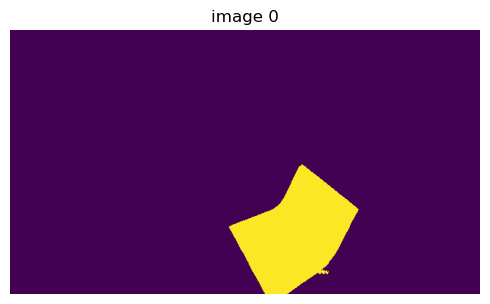

In [44]:
# import torch
# a = torch.zeros_like(pix_to_instance)
# i = 7
# a[pix_to_instance == uniques[i]] = uniques[i]
# plot_imgs(a)